#### About the datset

#### This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.  

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [3]:
df = pd.read_csv("loan_prediction.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### We are supposed to predict the Loan_Status, and it have two values Y and N where Y stands for yes and N stands for No

#### Checking for Null values

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Dataset null values in Gender, Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

#### Plotting the relationship between LoanAmount, Loan_Amount_Term, Credit_History with Loan_Status

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

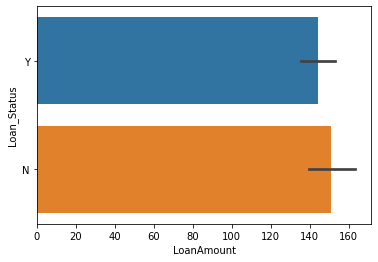

In [6]:
sns.barplot(x='LoanAmount',y='Loan_Status',data=df)

#### Loan_Status is rejected when the LoanAmount is higher, but that effect is negligible

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

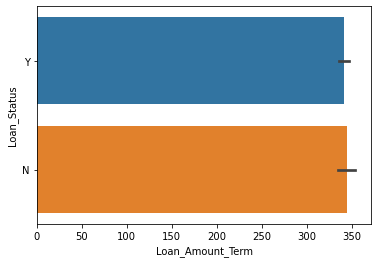

In [7]:
sns.barplot(x='Loan_Amount_Term',y='Loan_Status',data=df)

#### Both the classes are having same value

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

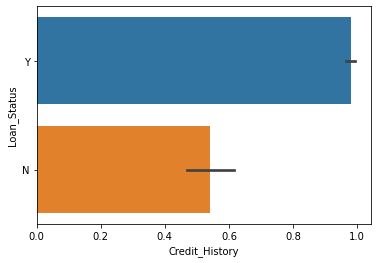

In [8]:
sns.barplot(x='Credit_History',y='Loan_Status',data=df)

#### If Credit_History is high chance of approving loan is higher

#### Handling the Null values

#### Repalcing the null values with mode on object columns and 
#### Replacing the null values with mean on float dtype

In [9]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["LoanAmount"] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df["Loan_Amount_Term"] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df["Credit_History"] = df['Credit_History'].fillna(df['Credit_History'].mean())

#### Plotting the graph for numerical columns to check 

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

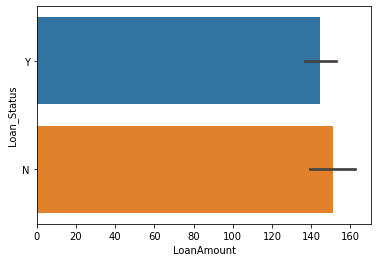

In [10]:
sns.barplot(x='LoanAmount',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

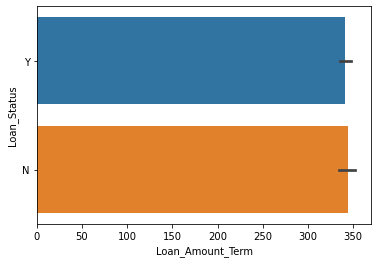

In [11]:
sns.barplot(x='Loan_Amount_Term',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

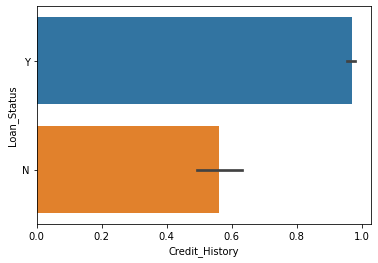

In [12]:
sns.barplot(x='Credit_History',y='Loan_Status',data=df)

#### The trend remains the same

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Now the dataset doesn't have any null values

#### Using Label Encoding techniques to convert categorical variables to numerical

In [14]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in df:
    df[column] = label_enc.fit_transform(df[column])
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,100,9,2,2,1
1,1,1,1,1,0,0,306,60,81,9,2,0,0
2,2,1,1,0,0,1,139,0,26,9,2,2,1
3,3,1,1,0,1,0,90,160,73,9,2,2,1
4,4,1,0,0,0,0,381,0,94,9,2,2,1


#### In Loan_Status column 1 represents Yes and 0 represents No

In [15]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,609,0,0,0,0,0,125,0,29,9,2,0,1
610,610,1,1,3,0,0,275,0,7,5,2,0,1
611,611,1,1,1,0,0,431,3,163,9,2,2,1
612,612,1,1,2,0,0,422,0,133,9,2,2,1
613,613,0,0,0,0,1,306,0,86,9,0,1,0


#### Setting Loan_ID as index

In [16]:
df = df.set_index('Loan_ID')
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
0,1,0,0,0,0,376,0,100,9,2,2,1
1,1,1,1,0,0,306,60,81,9,2,0,0


#### EDA

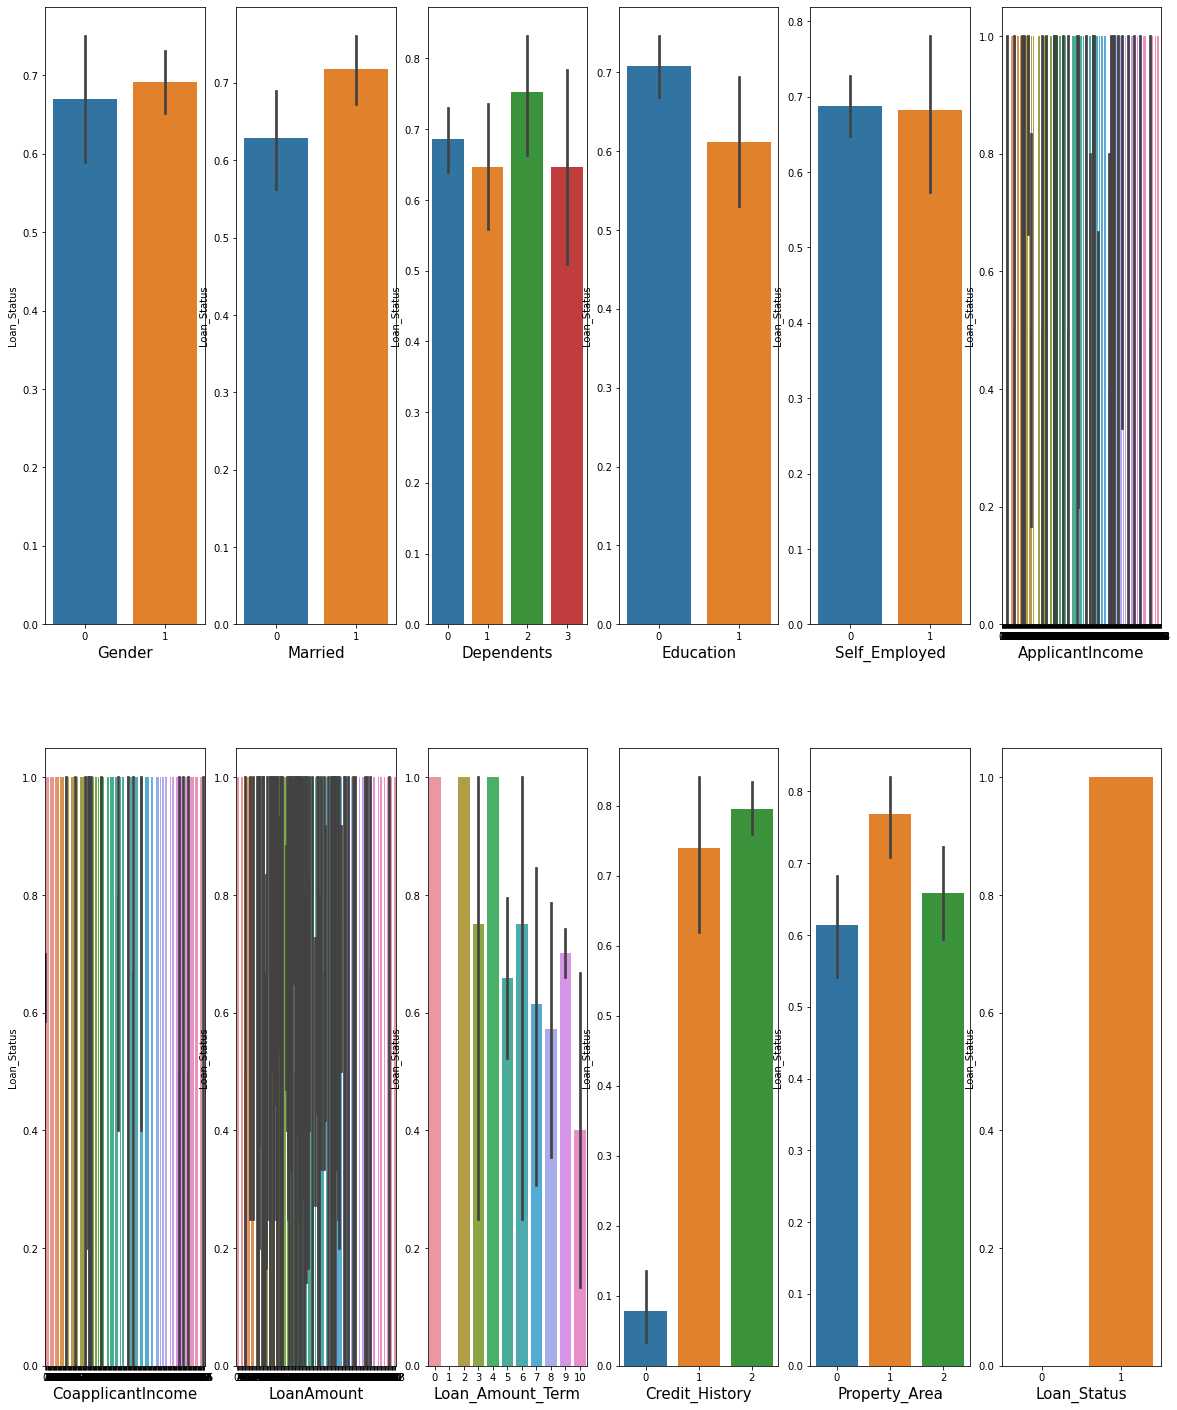

In [17]:
plt.figure(figsize=(20,25))
gr = 1
for column in df:
    if gr<=12:
        ax = plt.subplot(2,6,gr)
        sns.barplot(x = df[column],y=df['Loan_Status'],data=df)
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Checking Correlation

In [18]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.074223,0.180774,0.151163,-0.069368,0.019882,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.010497,0.207905,0.184857,-0.087657,-0.005177,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.137382,-0.065140,0.161153,-0.094810,-0.029681,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.190873,-0.052724,-0.172249,-0.088487,-0.083070,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.199142,-0.036033,0.117717,-0.031174,-0.003643,-0.030860,-0.003700
ApplicantIncome,0.074223,0.010497,0.137382,-0.190873,0.199142,1.000000,-0.248763,0.525324,-0.016402,0.048375,-0.065143,-0.003123
CoapplicantIncome,0.180774,0.207905,-0.065140,-0.052724,-0.036033,-0.248763,1.000000,0.264136,-0.020010,-0.036084,-0.082223,0.007812
LoanAmount,0.151163,0.184857,0.161153,-0.172249,0.117717,0.525324,0.264136,1.000000,0.065580,-0.014301,-0.084076,-0.049717
Loan_Amount_Term,-0.069368,-0.087657,-0.094810,-0.088487,-0.031174,-0.016402,-0.020010,0.065580,1.000000,0.023971,-0.091598,0.002512
Credit_History,0.019882,-0.005177,-0.029681,-0.083070,-0.003643,0.048375,-0.036084,-0.014301,0.023971,1.000000,-0.009898,0.513319


#### Credit_History have high correlation with Loan_Status
#### ApplicantIncome and LoanAmount is correlated. But ApplicantIncome is least correlated with our target variable

#### Statistical Analysis of the Data

In [19]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,247.117264,78.884365,87.719870,8.526059,1.628664,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,143.537853,92.623999,45.670174,1.404423,0.724018,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,120.250000,0.000000,53.250000,9.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,244.500000,33.500000,82.000000,9.000000,2.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,369.750000,153.750000,116.750000,9.000000,2.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,504.000000,286.000000,203.000000,10.000000,2.000000,2.000000,1.000000


#### CoapplicantIncome and LoanAmount might have outliers

#### Checking for outliers

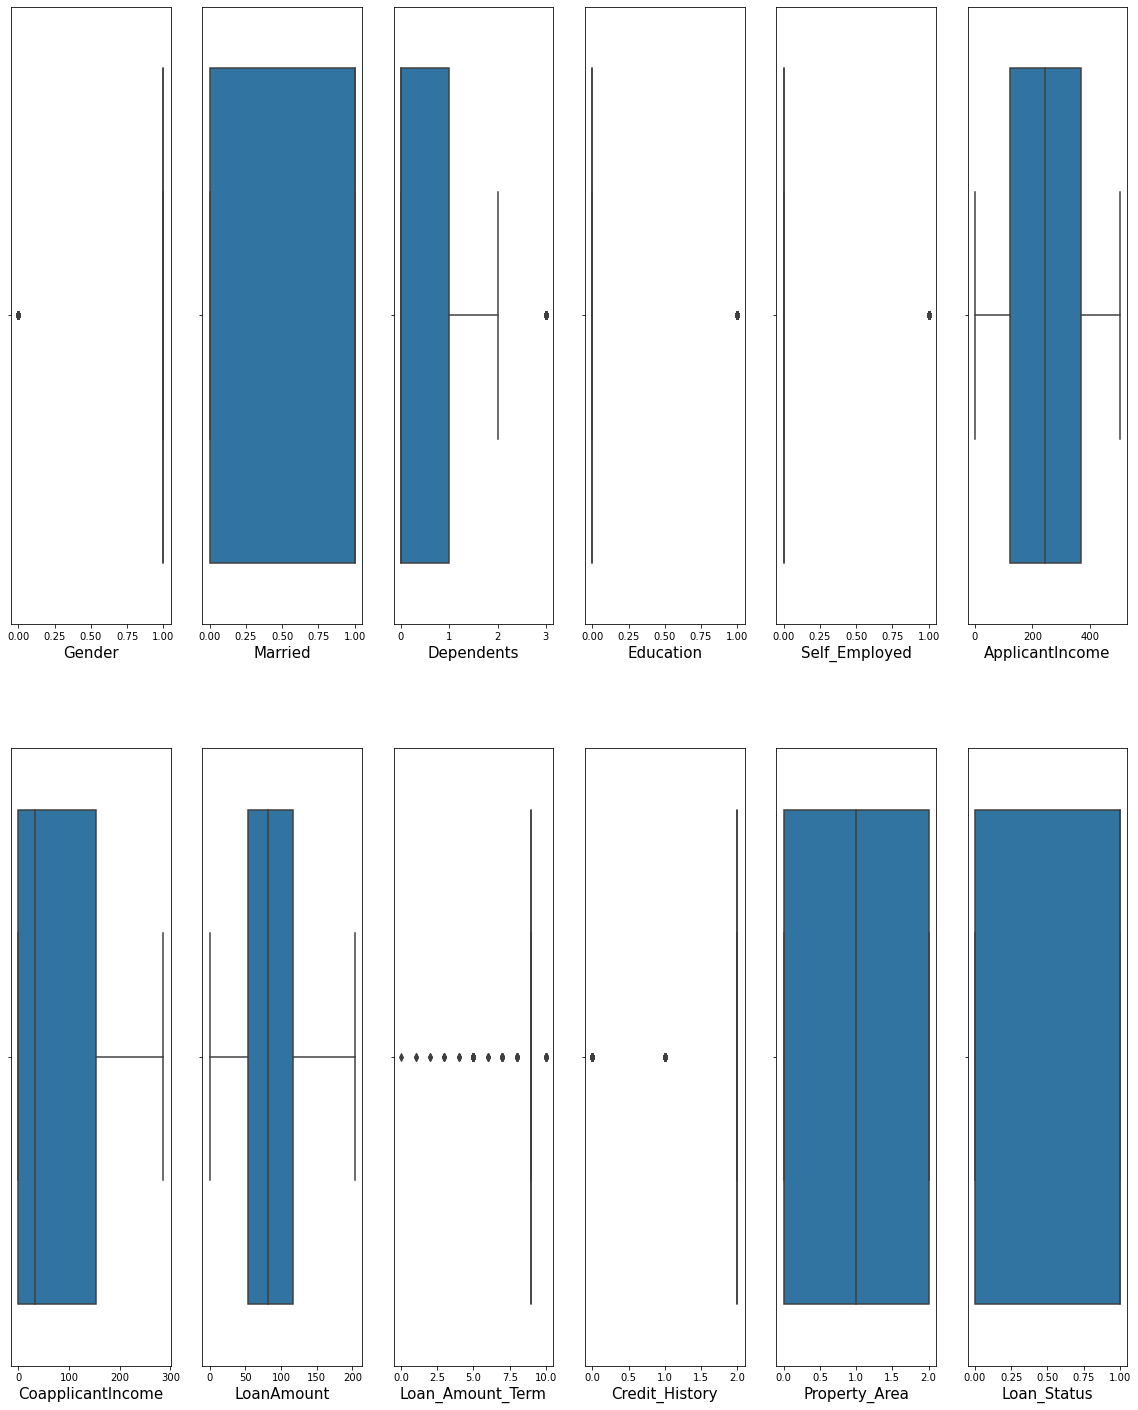

In [20]:
plt.figure(figsize=(20,25))
gr = 1
for column in df:
    if gr<=12:
        ax = plt.subplot(2,6,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Outliers exist in the dataset

#### Checking skewness

In [21]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -2.907201
Credit_History      -1.606726
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

#### Skewness exist in all the columns except ApplicantIncome,Property_Area and LoanAmount

#### Visualizing the distribution

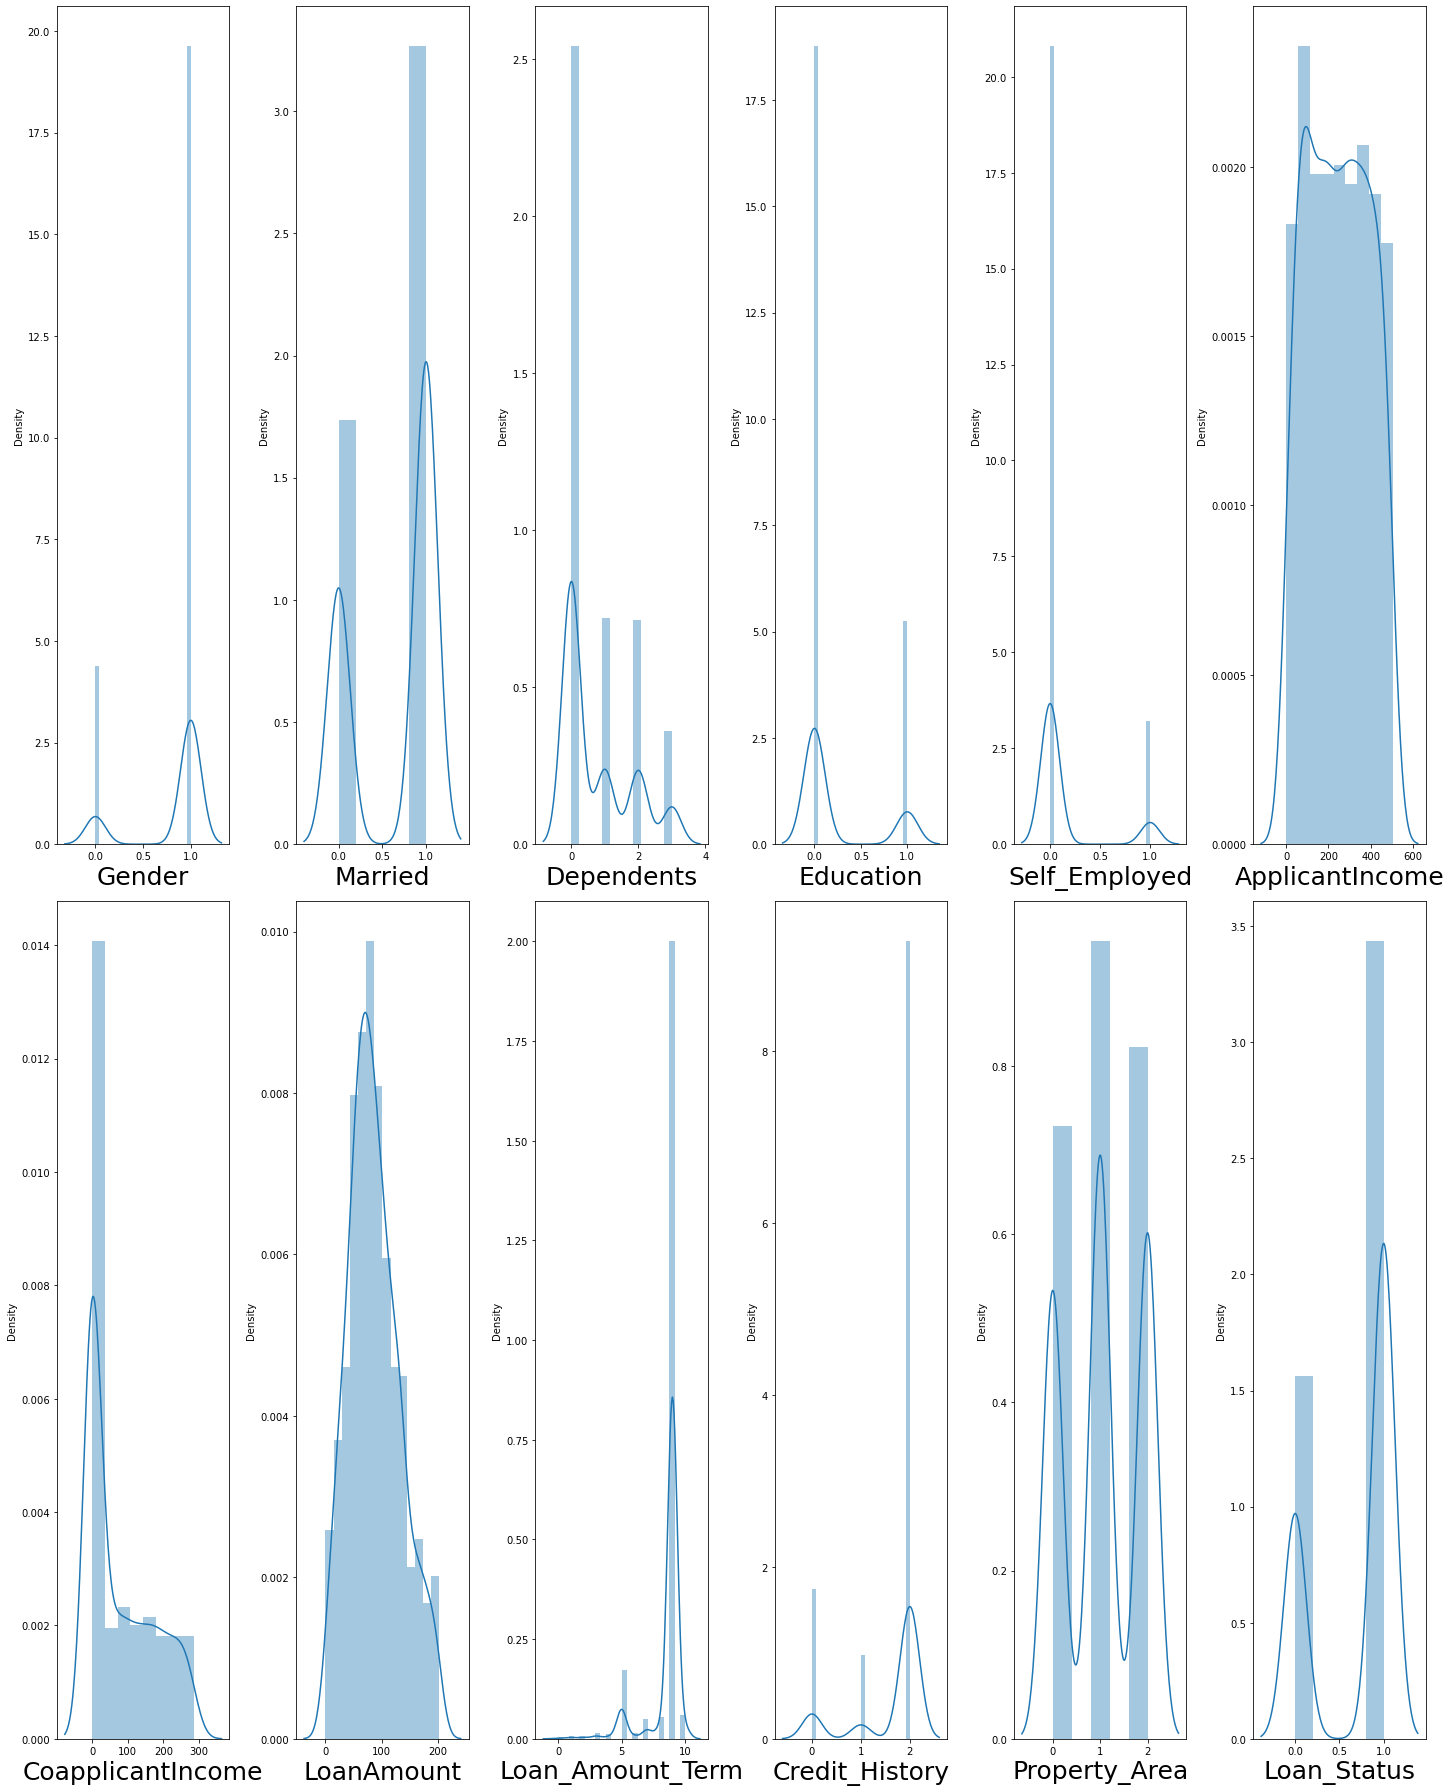

In [22]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Data Cleaning

#### Dropping 'Loan_Amount_Term','Self_Employed','Dependents' and 'Gender' columns as they have negligible correlation with target variable as well as they are skewed

In [23]:
df = df.drop(columns=['Loan_Amount_Term','Self_Employed','Dependents','Gender'])
df.head(3)

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,
0,0,0,376,0,100,2,2,1
1,1,0,306,60,81,2,0,0
2,1,0,139,0,26,2,2,1


In [24]:
df.shape

(614, 8)

#### Visualizing class imbalance

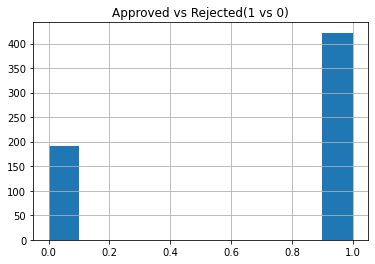

In [25]:
df['Loan_Status'].hist(grid=True)
plt.title("Approved vs Rejected(1 vs 0)")
plt.show()

#### It is clear that the class is imbalanced

#### After data cleaning the dataset doesn't have any outliers

#### Splitting the dataset into feature variables(x) and target variable(y)

In [26]:
x = df.drop("Loan_Status",axis=1)
y = df['Loan_Status']

#### Removing skewness

In [27]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-1.37208932, -0.52836225,  0.89311973, ...,  0.35552723,
         0.53892375,  1.1935668 ],
       [ 0.72881553, -0.52836225,  0.47751269, ..., -0.04379932,
         0.53892375, -1.35000343],
       [ 0.72881553, -0.52836225, -0.66368106, ..., -1.46965583,
         0.53892375,  1.1935668 ],
       ...,
       [ 0.72881553, -0.52836225,  1.20304708, ...,  1.51795879,
         0.53892375,  1.1935668 ],
       [ 0.72881553, -0.52836225,  1.15320585, ...,  0.98951807,
         0.53892375,  1.1935668 ],
       [-1.37208932, -0.52836225,  0.47751269, ...,  0.06427056,
        -1.97801094,  0.00236103]])

In [28]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

Married             -0.644850
Education            1.367622
ApplicantIncome     -0.262193
CoapplicantIncome   -0.039267
LoanAmount          -0.056043
Credit_History      -1.336832
Property_Area       -0.158267
dtype: float64

#### Still skewness exists

#### Balancing the data by upsampling

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [30]:
y_over.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

#### Scaling the data

In [31]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_over)

#### Finding the best random state

In [32]:
from sklearn.linear_model import LogisticRegression
max_accuracy = 0
max_rs = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_over,test_size=0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.8388625592417062 when 9 is the random state


#### Splitting the dataset into train and test

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_over,test_size=0.25,random_state = 9)

### Model Training

#### i) Logistic Regression

In [34]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression model is ",lr_accuracy)
print("Confusion Matrix","\n",confusion_matrix(y_test,y_pred_lr))
classification_rep = classification_report(y_test,y_pred_lr)
print("Classification report ; \n",classification_rep)

Accuracy of Logistic Regression model is  0.8388625592417062
Confusion Matrix 
 [[85 16]
 [18 92]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       101
           1       0.85      0.84      0.84       110

    accuracy                           0.84       211
   macro avg       0.84      0.84      0.84       211
weighted avg       0.84      0.84      0.84       211



#### Logistic Regression works with an accuracy of 83.89%

#### ii) Decision tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
conf_mat = confusion_matrix(y_test,y_pred_dt)
classification_rep = classification_report(y_test,y_pred_dt)
print("Accuracy of Decision Tree classifier model is ",dt_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Decision Tree classifier model is  0.7819905213270142
Confusion Matrix 
 [[86 15]
 [31 79]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       101
           1       0.84      0.72      0.77       110

    accuracy                           0.78       211
   macro avg       0.79      0.78      0.78       211
weighted avg       0.79      0.78      0.78       211



#### Decisiontree works with an accuracy of 78.20%

#### iii)Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
conf_mat = confusion_matrix(y_test,y_pred_rf)
classification_rep = classification_report(y_test,y_pred_rf)
print("Accuracy of Random forest classifier model is ",rf_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  0.8246445497630331
Confusion Matrix 
 [[84 17]
 [20 90]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       101
           1       0.84      0.82      0.83       110

    accuracy                           0.82       211
   macro avg       0.82      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211



#### RandomForest works with an accuracy of 82.46%

#### iv)SVC

In [37]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
conf_mat = confusion_matrix(y_test,y_pred_svc)
classification_rep = classification_report(y_test,y_pred_svc)
print("Accuracy of SVC model is ",svc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of SVC model is  0.8199052132701422
Confusion Matrix 
 [[ 73  28]
 [ 10 100]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.88      0.72      0.79       101
           1       0.78      0.91      0.84       110

    accuracy                           0.82       211
   macro avg       0.83      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211



#### SVC works with an accuracy of 82%

#### v) XGBoost Classifier

In [38]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[18:47:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.8151658767772512
Confusion Matrix 
 [[86 15]
 [24 86]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.78      0.85      0.82       101
           1       0.85      0.78      0.82       110

    accuracy                           0.82       211
   macro avg       0.82      0.82      0.82       211
weighted avg       0.82      0.82      0.82       211



#### XGB works with an accuracy of 81.52%

### Cross-Validating

In [39]:
cvs = cross_val_score(lr,X_scaled,y_over,cv=5)
print("Cross validation score of Logistic Regression model is : ",cvs.mean())

Cross validation score of Logistic Regression model is :  0.7630600169061708


In [40]:
cvs = cross_val_score(dt,X_scaled,y_over,cv=5)
print("Cross validation score of DecisionTreeClassifier is : ",cvs.mean())

Cross validation score of DecisionTreeClassifier is :  0.7416807551422936


In [41]:
cvs = cross_val_score(rf,X_scaled,y_over,cv=5)
print("Cross validation score of RandomForestClassifier is : ",cvs.mean())

Cross validation score of RandomForestClassifier is :  0.7938856015779093


In [42]:
cvs = cross_val_score(svc,X_scaled,y_over,cv=5)
print("Cross validation score of SVC is : ",cvs.mean())

Cross validation score of SVC is :  0.7666384897154128


In [43]:
cvs = cross_val_score(xgbc,X_scaled,y_over,cv=5)
print("Cross validation score of XGBoostClassifier is : ",cvs.mean())

[18:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Finding the Best Model

In [44]:
model = pd.DataFrame([["Logistic Regression","83.89","76.31","7.58"],["DecisionTreeClassifier","78.20","74.17","4.03"],["RandomForestClassifier","82.46","79.39","3.07"],["SVC","82","76.66","5.34"],["XGBoostClassifier","81.52","81.52","0.00"]],columns=["Model","Accuracy","Cross Validation Score","Difference"])
model

,Model,Accuracy,Cross Validation Score,Difference
0,Logistic Regression,83.89,76.31,7.58
1,DecisionTreeClassifier,78.20,74.17,4.03
2,RandomForestClassifier,82.46,79.39,3.07
3,SVC,82,76.66,5.34
4,XGBoostClassifier,81.52,81.52,0.00


#### XGBoost turns out to be the best model with least difference

#### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV
params = {'learning_rate':np.arange(0.05,0.2),
          'n_estimators':[10,200,10],
          'max_depth':[2,12,2],
          'min_child_weight':[1,10,1]
         }
grid = GridSearchCV(estimator = xgbc,param_grid = params,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

[18:54:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters are 
 {'learning_rate': 0.05, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 200}


In [48]:
xgbc = XGBClassifier(learning_rate=0.05,max_depth=12,min_child_weight=1,n_estimators=200)
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[18:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.8530805687203792
Confusion Matrix 
 [[90 11]
 [20 90]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       101
           1       0.89      0.82      0.85       110

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.86      0.85      0.85       211



#### After Hyperparameter tuning accuracy increased to 85.31%

#### Plotting ROC Curve

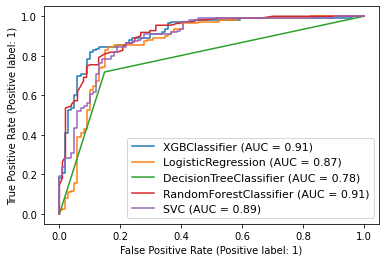

In [49]:
disp = plot_roc_curve(xgbc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### Saving the model

In [50]:
filename = 'loan_prediction.pkl'
pickle.dump(xgbc,open(filename,'wb'))